# Lab 08 Exercises: Linear Algebra (PCA)

## 1\. PCA on 3D dataset (done)

1. (done) Generate a dataset with $M = 3$ features and N ${\cal O}(1000)$ measurements. Specifically, with $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 features $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
2. (done) Find the eigenvectors and eigenvalues of the covariance matrix of the dataset.
3. (done) Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result.
4. (done) What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
5. (done) Redefine the data in the basis yielded by the PCA procedure.
6. (done) Plot the data points in the original and the new coordinates as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


### 1.

Generate a dataset with $M = 3$ features and N ${\cal O}(1000)$ measurements. Specifically, with $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 features $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$

In [1]:
import pandas as pd
from numpy import random
import numpy as np
random.seed(102340)

N = 1000
x1 = random.normal(loc= 0, scale = 1, size = N)
x2 = x1 + random.normal(loc= 0, scale = 3, size = N)
x3 = 2*x1 + x2

# build numpy matrix
X = np.vstack((x1, x2, x3))
#print(data_array.shape) shape is (3 rows, 1000 columns) Ready to be passed on to numpy cov() method.

# compute covariance matrix
covariance_matrix = np.cov(X)
print("Covariance matrix: \n" ,covariance_matrix)

Covariance matrix: 
 [[ 0.99371301  0.87634961  2.86377563]
 [ 0.87634961  9.8895715  11.64227071]
 [ 2.86377563 11.64227071 17.36982198]]


### 2.

Find the eigenvectors and eigenvalues of the covariance matrix of the dataset.

$$ \Lambda = Q^T \cdot \Sigma \cdot Q $$

where $\Lambda_{i,\, i} = \lambda_i$ is the i-th eigenvalue of $\Sigma$ and the columns of $Q$ are the associated eigenvectors.

In [2]:
# Eigenvalues, eigenvectors using diagonalization
from scipy import linalg as la
eigval, eigvect = la.eig(covariance_matrix)

print ("eigenvectors: \n", eigvect, end = '\n\n')
print ("eigenvalues: \n", eigval, end = '\n\n') # by default, this returns complex values. but in this case (cov is symmetric)...
print("eigenvalues (real): \n", np.real_if_close(eigval)) # ... we now the eigval are real

eigenvectors: 
 [[-0.11185642 -0.81649658  0.56641105]
 [-0.5818526  -0.40824829 -0.70340663]
 [-0.80556545  0.40824829  0.42941547]]

eigenvalues: 
 [2.61765766e+01+0.j 2.17820035e-16+0.j 2.07652988e+00+0.j]

eigenvalues (real): 
 [2.61765766e+01 2.17820035e-16 2.07652988e+00]


In [3]:
Lambda = np.diag( np.real_if_close(eigval) )
Q = eigvect

is_this_Lambda = Q.T @ covariance_matrix @ Q

print(is_this_Lambda, '\n\n')
print(Lambda, '\n\n')

# The check is completed. The new basis vectors are:
v0 = Q[:, 0]
v1 = Q[: , 1]
v2 = Q[:,  2]


[[ 2.61765766e+01  6.55619476e-16 -1.73364006e-15]
 [ 3.86918756e-16 -4.77358134e-16 -1.43515792e-15]
 [-3.21964677e-15 -1.16573418e-15  2.07652988e+00]] 


[[2.61765766e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.17820035e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.07652988e+00]] 




### 3. 

Find the eigenvectors and eigenvalues of $\Sigma$ using SVD on the data matrix $X$ instead. Check that the two procedures give the expected result.


Say $X$ is the data matrix with $n$ number of samples rows and $p$ (number of features) columns. The SVD decomposition on $X$ is:

$$ X = U\cdot D \cdot V^T$$

and, given that, as before, $\Lambda = Q^T\cdot \Sigma \cdot Q$,  is the eigendecomposition of $\Sigma$, 

then

$$ \Lambda_{i, i} = \frac{ (D_{i,\,i})^2}{N-1}$$

and 

$$ V = Q$$

More precisely, the above identity is expected to be valid up to a re-ordering of the columns of $Q$, i.e. the eigenvalue -th of $\Lambda$ could be in the j-th diagonal element of $D$ with $j \neq i$. What matters is that the set of eigenvalues and eigenvectors is the same.

In [4]:
# Eigenvalues, eigenvectors using SVD

U, D_diagonal, Vt = la.svd(X.T) # I defined X with shape (3, 1000) so I need to transpose here

print (D_diagonal,'\n\n')
print( Vt.T, '\n\n')

print("Covariance matrix eigenvalues: ", np.square(D_diagonal)/(N - 1)) # Same as before!

[1.61909691e+02 4.55471094e+01 1.49536927e-14] 


[[-0.11191164  0.56640014 -0.81649658]
 [-0.58178403 -0.70346334 -0.40824829]
 [-0.8056073   0.42933694  0.40824829]] 


Covariance matrix eigenvalues:  [2.62409890e+01 2.07661579e+00 2.23836762e-31]


### 4. 

 What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.

*Answer:*


As we would have expected, there is an (almost) zero eigenvalue: this corresponds to the fact that x3 is a linear combination of x1 and x2 with no statistical noise at all.
The two other eigenvalues have magnitude ratio 1:10. It corresponds to the fact that the std of the two variables x1 and x2 is different (ratio 1:3).


The variability explained by taking the first $k < p$ largest eigenvalues of $\Lambda$ is:

$$\frac{ \sum_{i = 1}^{k} \lambda_i }{tr(\Lambda)}$$

being $\Lambda$ the covariance matrix of the dataset expressed in the new basis ($\vec{x}' = Q^T \vec{x}$). 

In [5]:
eigval = np.real_if_close(eigval)
eigval.sort() # sort in ascending ordeer
eigval = eigval[::-1] # reverse
eigval


p = 1 # principal components retained
explained_variability = np.sum(eigval[:p]) / np.sum(eigval)

print(explained_variability)

0.9265025996635522


*Answer* the principal component explains $\simeq 92 \%$ of the total variability. It makes sense, because the features $x_2$ and $x_3$ where build as functions of the first feature $x_1$. In order to retain $\simeq 99 \%$ of the total variability, the dimensionality needs to be reduce from $p = 3$ to $p = 2$.

### 5.

Redefine the data in the basis yielded by the PCA procedure.

In [6]:
X_rotated = Q.T @ X # X_rotated has shape (3, 1000)

### 6. 

Plot the data points in the original and the new coordinates as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

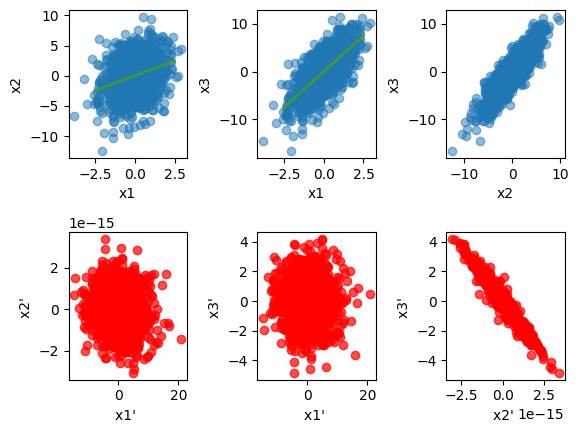

In [7]:
import matplotlib.pyplot as plt

pairs = [[0, 1], [0, 2], [1, 2]]
labels = [["x1", "x2"], ["x1", "x3"], ["x2", "x3"]]
rotated_labels = [["x1' ", "x2' "], ["x1' ", "x3' "], ["x2' ", "x3' "]]

fig, axs = plt.subplots(nrows = 2, ncols = 3)
for i in range(3):
    axs[0, i].scatter(x = X[pairs[i][0], :], y = X[pairs[i][1], :], alpha = 0.5)
    axs[1, i].scatter(x = X_rotated[pairs[i][0], :], y = X_rotated[pairs[i][1], :], color = "red", alpha = 0.7)
    axs[0, i].set_xlabel(labels[i][0])
    axs[0, i].set_ylabel(labels[i][1])

    axs[1, i].set_xlabel(rotated_labels[i][0])
    axs[1, i].set_ylabel(rotated_labels[i][1])

    dt = np.linspace(-2.5, +2.5, 100)
    axs[0, 0].plot(dt , dt)
    axs[0, 1].plot( dt, 3 *dt)

    

plt.subplots_adjust(wspace = 0.6, hspace = 0.5)

    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$

The variable $x_2'$ is squeezed to zero. It corresponds to the coordinate along the direction given by:

In [8]:
v2

array([ 0.56641105, -0.70340663,  0.42941547])

## 2\. PCA on a nD dataset

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [13]:
num_noise_variables = 10
random.seed(102340)
sigma = 1./10
noise_matrix = np.zeros(shape = (num_noise_variables, N))
for i in range(10):
    noise_matrix[i,:] = random.normal(loc= 0, scale = sigma, size = N)

In [14]:
new_X = np.vstack( (X, noise_matrix) )
new_X.shape

(13, 1000)

In [15]:
covariance_matrix = np.cov(new_X)

from scipy import linalg as la
eigval, eigvect = la.eig(covariance_matrix)


eigval = np.real_if_close(eigval)
eigval.sort() # sort in ascending order
eigval = eigval[::-1] #reverse (descending order)

print("eigenvalues: ", eigval)


p = 2 # principal components selected
explained_variability = np.sum(eigval[:p]) / np.sum(eigval)
explained_variability

eigenvalues:  [ 2.61863697e+01  2.08696105e+00  1.14689591e-02  1.08676380e-02
  1.03125909e-02  9.85093492e-03  9.52304003e-03  9.12082035e-03
  8.90516018e-03  8.38629623e-03  5.61569050e-19 -1.01665994e-17
 -7.01356487e-16]


np.float64(0.9972334901740083)

*Answer* The variables we added are uncorrelated and almost constant (their std is much smaller than the std of the first three features). Indeed still $p = 2 $ features are enough to explain $99\%$ of the variability in the data.

## 3 \. Looking at an oscillating spring (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


## 4\. PCA on the MAGIC dataset (optional)

Perform a PCA on the magic04.data dataset

In [12]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

zsh:1: command not found: wget
zsh:1: command not found: wget
